# ライブラリ読み込み

In [58]:
# ライブラリのインポート
## データ加工・可視化系ライブラリ
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(font='IPAexGothic')

%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, learning_curve
from sklearn.metrics import classification_report, roc_curve, auc, precision_recall_curve

# データ読み込み

In [59]:
# データのインポート
## 学習用データ 13列 11900行、Y列がある
train = pd.read_csv('train.csv')
## テスト用データ 12列 5100行、Y列がない
test = pd.read_csv('test.csv')

In [60]:
train.head()

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,0,31,services,married,secondary,no,12294,yes,no,cellular,21,nov,101,3,498,0,other,0
1,1,29,entrepreneur,single,tertiary,no,43027,no,no,cellular,22,aug,158,2,702,0,unknown,1
2,2,35,management,married,tertiary,no,12252,yes,no,cellular,11,nov,351,1,826,0,failure,0
3,3,31,technician,married,secondary,no,99121,yes,yes,unknown,16,may,658,2,120,0,failure,0
4,4,48,unemployed,married,primary,no,42005,yes,no,telephone,3,apr,177,1,273,0,unknown,0


In [61]:
train["education"].unique()

array(['secondary', 'tertiary', 'primary', 'unknown'], dtype=object)

# default, housing, loan　0-1化

In [62]:
train["default"][train["default"] == "yes"] = 1
train["default"][train["default"] == "no"] = 0
train["default"] = train["default"].astype(int)
train["housing"][train["housing"] == "yes"] = 1
train["housing"][train["housing"] == "no"] = 0
train["housing"] = train["housing"].astype(int)
train["loan"][train["loan"] == "yes"] = 1
train["loan"][train["loan"] == "no"] = 0
train["loan"] = train["loan"].astype(int)

/var/folders/42/922wnzy13c1bxs6j8mf7gwq00000gn/T/ipykernel_29940/2689994591.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train["default"][train["default"] == "yes"] = 1
/var/folders/42/922wnzy13c1bxs6j8mf7gwq00000gn/T/ipykernel_29940/2689994591.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train["default"][train["default"] == "no"] = 0
/var/folders/42/922wnzy13c1bxs6j8mf7gwq00000gn/T/ipykernel_29940/2689994591.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexin

In [63]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27100 entries, 0 to 27099
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         27100 non-null  int64 
 1   age        27100 non-null  int64 
 2   job        27100 non-null  object
 3   marital    27100 non-null  object
 4   education  27100 non-null  object
 5   default    27100 non-null  int64 
 6   balance    27100 non-null  int64 
 7   housing    27100 non-null  int64 
 8   loan       27100 non-null  int64 
 9   contact    27100 non-null  object
 10  day        27100 non-null  int64 
 11  month      27100 non-null  object
 12  duration   27100 non-null  int64 
 13  campaign   27100 non-null  int64 
 14  pdays      27100 non-null  int64 
 15  previous   27100 non-null  int64 
 16  poutcome   27100 non-null  object
 17  y          27100 non-null  int64 
dtypes: int64(12), object(6)
memory usage: 3.7+ MB


# dummy変数

In [64]:
train_dummy = pd.get_dummies(train)
train_dummy.head()

,id,age,default,balance,housing,loan,day,duration,campaign,pdays,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,0,31,0,12294,1,0,21,101,3,498,...,0,0,0,1,0,0,0,1,0,0
1,1,29,0,43027,0,0,22,158,2,702,...,0,0,0,0,0,0,0,0,0,1
2,2,35,0,12252,1,0,11,351,1,826,...,0,0,0,1,0,0,1,0,0,0
3,3,31,0,99121,1,1,16,658,2,120,...,0,0,1,0,0,0,1,0,0,0
4,4,48,0,42005,1,0,3,177,1,273,...,0,0,0,0,0,0,0,0,0,1


# 標準化(age,balance,day,duration,campaign,pdays)

In [65]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train_dummy["age_std"] = scaler.fit_transform(train_dummy[["age"]])
train_dummy["balance_std"] = scaler.fit_transform(train_dummy[["balance"]])
train_dummy["day_std"] = scaler.fit_transform(train_dummy[["day"]])
train_dummy["duration_std"] = scaler.fit_transform(train_dummy[["duration"]])
train_dummy["campaign_std"] = scaler.fit_transform(train_dummy[["campaign"]])
train_dummy["pdays_std"] = scaler.fit_transform(train_dummy[["pdays"]])
train_dummy["previous_std"] = scaler.fit_transform(train_dummy[["previous"]])
train_dummy_std = train_dummy.drop(["age", "balance", "day", "duration", "campaign", "pdays", "previous"], axis=1)


# 相関行列

In [47]:
corr_mat = train_dummy_std.corr(method='pearson')
corr_mat

,id,default,housing,loan,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,poutcome_other,poutcome_success,poutcome_unknown,age_std,balance_std,day_std,duration_std,campaign_std,pdays_std,previous_std
id,1.000000,0.009388,0.001687,0.007684,0.002318,-0.005676,-0.004990,0.004241,0.002110,-0.004055,...,-0.000568,0.001466,-0.007301,0.008676,0.002334,-0.001731,-0.001855,-0.007897,0.001369,-0.003045
default,0.009388,1.000000,0.000634,0.004193,-0.005586,-0.007014,0.008360,-0.004054,-0.003250,-0.004696,...,-0.003407,-0.002519,0.007996,-0.004850,0.004279,-0.011317,-0.004793,-0.011645,-0.002003,-0.004501
housing,0.001687,0.000634,1.000000,0.007575,-0.164710,0.003872,0.180535,-0.062705,-0.134786,-0.002559,...,0.036075,-0.054211,-0.037669,-0.287988,0.010994,0.128419,0.178890,-0.102108,0.000877,-0.041737
loan,0.007684,0.004193,0.007575,1.000000,-0.062696,0.033818,-0.015011,0.059748,-0.033635,-0.077734,...,-0.029064,-0.044056,0.072475,-0.043499,-0.007877,-0.097798,-0.074189,0.107007,-0.010835,-0.051035
y,0.002318,-0.005586,-0.164710,-0.062696,1.000000,0.011805,-0.039639,0.003398,0.007732,0.016039,...,-0.019517,0.294006,-0.061383,0.086668,-0.000899,-0.011803,-0.030313,-0.030653,-0.000116,0.188473
job_admin.,-0.005676,-0.007014,0.003872,0.033818,0.011805,1.000000,-0.193778,-0.077026,-0.061759,-0.180975,...,0.009903,0.018785,-0.025664,-0.069166,-0.003406,-0.018545,-0.024489,0.030437,0.000686,0.032501
job_blue-collar,-0.004990,0.008360,0.180535,-0.015011,-0.039639,-0.193778,1.000000,-0.111994,-0.089796,-0.263133,...,0.012664,-0.009454,0.022476,-0.081459,-0.006573,-0.004378,0.043098,-0.031010,-0.000253,-0.022315
job_entrepreneur,0.004241,-0.004054,-0.062705,0.059748,0.003398,-0.077026,-0.111994,1.000000,-0.035694,-0.104595,...,-0.014032,-0.013492,0.010568,0.012629,0.003416,-0.029938,-0.019928,0.024020,0.004450,-0.018476
job_housemaid,0.002110,-0.003250,-0.134786,-0.033635,0.007732,-0.061759,-0.089796,-0.035694,1.000000,-0.083864,...,-0.020859,-0.011737,0.045740,0.132638,-0.004556,-0.022821,-0.042491,0.017482,-0.000922,-0.024303
job_management,-0.004055,-0.004696,-0.002559,-0.077734,0.016039,-0.180975,-0.263133,-0.104595,-0.083864,1.000000,...,0.007042,0.019172,-0.006725,-0.011813,-0.005627,0.069251,0.046763,-0.008452,0.003491,0.000949


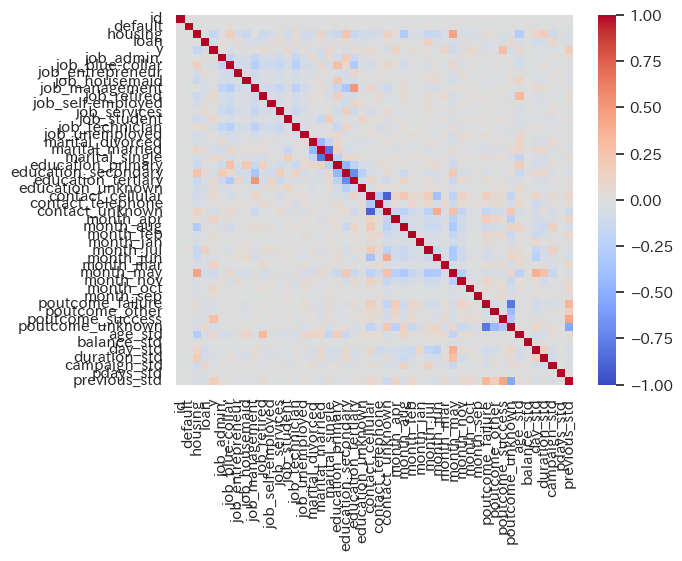

In [48]:
sns.heatmap(corr_mat,
            vmin=-1.0,
            vmax=1.0,
            center=0,
            #annot=True, # True:格子の中に値を表示
            fmt='.1f',
            xticklabels=corr_mat.columns.values,
            yticklabels=corr_mat.columns.values,
            cmap='coolwarm'
           )
plt.show()

# test_data加工

In [70]:
test["default"][test["default"] == "yes"] = 1
test["default"][test["default"] == "no"] = 0
test["default"] = test["default"].astype(int)
test["housing"][test["housing"] == "yes"] = 1
test["housing"][test["housing"] == "no"] = 0
test["housing"] = test["housing"].astype(int)
test["loan"][test["loan"] == "yes"] = 1
test["loan"][test["loan"] == "no"] = 0
test["loan"] = test["loan"].astype(int)

test_dummy = pd.get_dummies(test)

test_dummy["age_std"] = scaler.fit_transform(test_dummy[["age"]])
test_dummy["balance_std"] = scaler.fit_transform(test_dummy[["balance"]])
test_dummy["day_std"] = scaler.fit_transform(test_dummy[["day"]])
test_dummy["duration_std"] = scaler.fit_transform(test_dummy[["duration"]])
test_dummy["campaign_std"] = scaler.fit_transform(test_dummy[["campaign"]])
test_dummy["pdays_std"] = scaler.fit_transform(test_dummy[["pdays"]])
test_dummy["previous_std"] = scaler.fit_transform(test_dummy[["previous"]])
test_dummy_std = test_dummy.drop(["job_unknown","age", "balance", "day", "duration", "campaign", "pdays", "previous"], axis=1)


/var/folders/42/922wnzy13c1bxs6j8mf7gwq00000gn/T/ipykernel_29940/378709226.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["default"][test["default"] == "yes"] = 1
/var/folders/42/922wnzy13c1bxs6j8mf7gwq00000gn/T/ipykernel_29940/378709226.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["default"][test["default"] == "no"] = 0
/var/folders/42/922wnzy13c1bxs6j8mf7gwq00000gn/T/ipykernel_29940/378709226.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#

# 学習(決定木)

In [73]:
# scikit-learnのインポートをします
from sklearn import tree

In [111]:
# 「train」の目的変数と説明変数の値を取得
target = train_dummy_std["y"].values
features = train_dummy_std.drop(["y"], axis=1).values
# 「test」の説明変数の値を取得
test_features = test_dummy_std.values
 
# 決定木の作成とアーギュメントの設定
max_depth = 100
min_samples_split = 2
my_tree_two = tree.DecisionTreeClassifier(max_depth = max_depth, min_samples_split = min_samples_split, random_state = 1)
result = my_tree_two
my_tree_two = my_tree_two.fit(features, target) 
 

# 「test」の説明変数を使って「my_tree_one」のモデルで予測
my_prediction = my_tree_two.predict(test_features)
result.score(features,target)

1.0

In [88]:
# PassengerIdを取得
PassengerId = np.array(test["id"]).astype(int)
 
# my_prediction(予測データ）とPassengerIdをデータフレームへ落とし込む
my_solution = pd.DataFrame(my_prediction, PassengerId)
display(my_solution.head())
 
# my_tree_one.csvとして書き出し
my_solution.to_csv("my_tree_one.csv",header=False)

,0
0,1
1,0
2,0
3,0
4,0


# 学習(ランダムフォレスト)

In [110]:
# 決定木の作成とアーギュメントの設定
max_depth= 10
min_samples_split= 2 
n_estimators=50
my_tree_two = RandomForestClassifier(max_depth = max_depth, min_samples_split = min_samples_split,n_estimators = n_estimators, random_state = 1)
result = my_tree_two
my_tree_two = my_tree_two.fit(features, target) 
 

# 「test」の説明変数を使って「my_tree_one」のモデルで予測
my_prediction = my_tree_two.predict(test_features)
result.score(features,target)

0.9353505535055351

# 学習(ロジスティック分類)

In [89]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
result = lr
logistic = lr.fit(features, target) 
 

# 「test」の説明変数を使って「my_tree_one」のモデルで予測
my_prediction = logistic.predict(test_features)
result.score(features,target)

0.9267896678966789

In [90]:
# PassengerIdを取得
PassengerId = np.array(test["id"]).astype(int)
 
# my_prediction(予測データ）とPassengerIdをデータフレームへ落とし込む
my_solution = pd.DataFrame(my_prediction, PassengerId)
display(my_solution.head())
 
# my_tree_one.csvとして書き出し
my_solution.to_csv("my_logistic.csv",header=False)

,0
0,1
1,0
2,0
3,0
4,0


# 学習(SVM)

In [93]:
from sklearn.svm import SVC

C = 5
kernel = 'rbf'
gamma = 1
clf = SVC(C=C, kernel=kernel, gamma=gamma)
svm = clf.fit(features, target) 
 

# 「test」の説明変数を使って「my_tree_one」のモデルで予測
my_prediction = svm.predict(test_features)
clf.score(features,target)

1.0

In [94]:
# PassengerIdを取得
PassengerId = np.array(test["id"]).astype(int)
 
# my_prediction(予測データ）とPassengerIdをデータフレームへ落とし込む
my_solution = pd.DataFrame(my_prediction, PassengerId)
display(my_solution.head())
 
# my_tree_one.csvとして書き出し
my_solution.to_csv("my_svm.csv",header=False)

,0
0,0
1,0
2,0
3,0
4,0


# 学習(LightGBM)

In [114]:
import lightgbm as lgb

kf  = KFold(n_splits=5, shuffle=True, random_state=1234)
accuracies = []

for train_index, val_index in kf.split(features):
    # モデルと特徴選択器を新たに作成
    clf = lgb.LGBMClassifier()

    # データ分割
    X_train, X_val = features[train_index], features[val_index]
    y_train, y_val = target[train_index], target[val_index]

    clf.fit(X_train, y_train)
    predictions = clf.predict(X_val)

    # 精度の計算と保存
    accuracy = accuracy_score(y_val, predictions)
    accuracies.append(accuracy)
    print('Accuracy: %.2f' % accuracy)

# 平均精度の計算
average_accuracy = sum(accuracies) / len(accuracies)
print('Average Accuracy: %.2f' % average_accuracy)

OSError: dlopen(/Users/takumu/VScode/.venv/lib/python3.9/site-packages/lightgbm/lib_lightgbm.so, 0x0006): Library not loaded: /usr/local/opt/libomp/lib/libomp.dylib
  Referenced from: <D21A7969-4567-3BC7-94ED-6A9E83AE9D78> /Users/takumu/VScode/.venv/lib/python3.9/site-packages/lightgbm/lib_lightgbm.so
  Reason: tried: '/usr/local/opt/libomp/lib/libomp.dylib' (no such file), '/System/Volumes/Preboot/Cryptexes/OS/usr/local/opt/libomp/lib/libomp.dylib' (no such file), '/usr/local/opt/libomp/lib/libomp.dylib' (no such file), '/usr/lib/libomp.dylib' (no such file, not in dyld cache)

# 交差検証(KFold)

In [98]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_score, cross_validate
from sklearn.metrics import accuracy_score, mean_squared_error

from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel


In [105]:
kf  = KFold(n_splits=5, shuffle=True, random_state=1234)
accuracies = []

for train_index, val_index in kf.split(features):
    # モデルと特徴選択器を新たに作成
    model = RandomForestClassifier(n_estimators=100)

    # データ分割
    X_train, X_val = features[train_index], features[val_index]
    y_train, y_val = target[train_index], target[val_index]

    model.fit(X_train, y_train)
    predictions = model.predict(X_val)

    # 精度の計算と保存
    accuracy = accuracy_score(y_val, predictions)
    accuracies.append(accuracy)
    print('Accuracy: %.2f' % accuracy)

# 平均精度の計算
average_accuracy = sum(accuracies) / len(accuracies)
print('Average Accuracy: %.2f' % average_accuracy)

Accuracy: 0.93
Accuracy: 0.93
Accuracy: 0.93
Accuracy: 0.93
Accuracy: 0.94
Average Accuracy: 0.93


# グリッドサーチ

In [107]:
from sklearn.model_selection import GridSearchCV
# ランダムフォレストモデルのインスタンス化
model = RandomForestClassifier(random_state=1234)

# ハイパーパラメータのグリッドを定義
param_grid = {
    'n_estimators': [50, 100, 150, 200, 250, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# GridSearchCVの設定
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy',verbose=2)

# グリッドサーチの実行
grid_search.fit(features, target)

# 結果の表示
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV] END max_depth=None, min_samples_split=2, n_estimators=50; total time=   1.1s
[CV] END max_depth=None, min_samples_split=2, n_estimators=50; total time=   1.1s
[CV] END max_depth=None, min_samples_split=2, n_estimators=50; total time=   1.1s
[CV] END max_depth=None, min_samples_split=2, n_estimators=50; total time=   1.1s
[CV] END max_depth=None, min_samples_split=2, n_estimators=50; total time=   1.1s
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   2.0s
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   2.2s
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   2.3s
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   2.4s
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   2.2s
[CV] END max_depth=None, min_samples_split=2, n_estimators=150; total time=   3.2s
[CV] END max_depth=None, min_s